### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda =  pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


In [19]:
import pandas as pd
import plotly.express as px

# Asegúrate de que lat/lon sean numéricos en todos los DataFrames
for df in [tienda, tienda2, tienda3, tienda4]:
    df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
    df['lon'] = pd.to_numeric(df['lon'], errors='coerce')

# Limpia cada DataFrame (quita filas sin coordenadas)
tienda_geo     = tienda.dropna(subset=['lat', 'lon'])
tienda2_geo    = tienda2.dropna(subset=['lat', 'lon'])
tienda3_geo    = tienda3.dropna(subset=['lat', 'lon'])
tienda4_geo    = tienda4.dropna(subset=['lat', 'lon'])

# Función para mostrar mapa de una tienda
def mostrar_mapa(df_geo, nombre_tienda):
    fig = px.scatter_geo(
        df_geo,
        lat='lat',
        lon='lon',
        hover_name='Producto',
        title=f'Distribución geográfica de las ventas - {nombre_tienda}',
        opacity=0.6
    )
    fig.update_layout(geo=dict(showland=True, landcolor="lightgray"))
    fig.show()

# Mostrar mapas para las 4 tiendas
mostrar_mapa(tienda_geo, 'Tienda 1')
mostrar_mapa(tienda2_geo, 'Tienda 2')
mostrar_mapa(tienda3_geo, 'Tienda 3')
mostrar_mapa(tienda4_geo, 'Tienda 4')


In [21]:
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en el promedio de coordenadas
centro = [tienda['lat'].mean(), tienda['lon'].mean()]
m = folium.Map(location=centro, zoom_start=6)

# Agregar capa de puntos
for i, row in tienda.iterrows():
    if pd.notna(row['lat']) and pd.notna(row['lon']):
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=3,
            color='blue',
            fill=True,
            fill_opacity=0.4
        ).add_to(m)

# Mostrar mapa
m

#1. Análisis de facturación



In [4]:
facturacion = tienda['Precio'].sum()
facturacion2 = tienda2['Precio'].sum()
facturacion3 = tienda3['Precio'].sum()
facturacion4 = tienda4['Precio'].sum()
print(f'el total de facturación de tienda la tienda 1 es: {facturacion}, de la tienda 2 es: {facturacion2}, de la tienda 3 es: {facturacion3}, y de la tiena 4 es: {facturacion4}')

el total de facturación de tienda la tienda 1 es: 1150880400.0, de la tienda 2 es: 1116343500.0, de la tienda 3 es: 1098019600.0, y de la tiena 4 es: 1038375700.0


In [5]:
facturacion_total = tienda['Precio'].sum()
facturacion_total2 = tienda2['Precio'].sum()
facturacion_total3 = tienda3['Precio'].sum()
facturacion_total4 = tienda4['Precio'].sum()

print(f'el total de facturación de tienda la tienda 1 es: {facturacion_total}, de la tienda 2 es: {facturacion_total2}, de la tienda 3 es: {facturacion_total3}, y de la tiena 4 es {facturacion_total4}')

el total de facturación de tienda la tienda 1 es: 1150880400.0, de la tienda 2 es: 1116343500.0, de la tienda 3 es: 1098019600.0, y de la tiena 4 es 1038375700.0


In [6]:
from matplotlib import pyplot as plt

tiendas = ['tienda',' tienda2', 'tienda3', 'tienda4']
facturacion = [1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0 ]



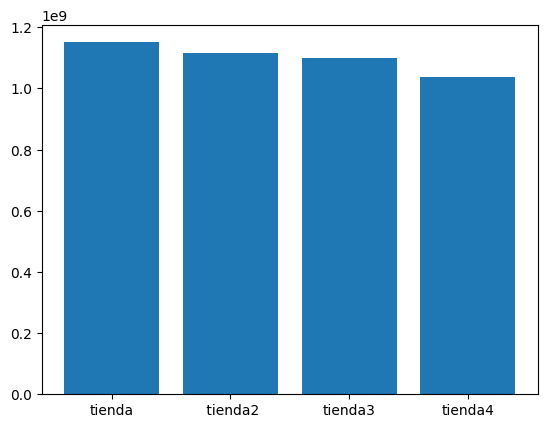

In [7]:
plt.bar(x = tiendas, height = facturacion)
plt.show()


# 2. Ventas por categoría

In [9]:
Venta_por_categoria = tienda['Categoría del Producto'].value_counts()
Venta_por_categoria2 = tienda2['Categoría del Producto'].value_counts()
Venta_por_categoria3 = tienda3['Categoría del Producto'].value_counts()
Venta_por_categoria4 = tienda4['Categoría del Producto'].value_counts()

print("Ventas por categoría en Tienda 1:")
print(Venta_por_categoria.to_string())

print("Ventas por categoría en Tienda 2:")
print(Venta_por_categoria2.to_string())

print("Ventas por categoría en Tienda 3:")
print(Venta_por_categoria3.to_string())

print("Ventas por categoría en Tienda 4:")
print(Venta_por_categoria4.to_string())

Ventas por categoría en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Ventas por categoría en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Ventas por categoría en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Ventas por categoría en Tienda 4:
Categoría del Producto
Muebles                    4

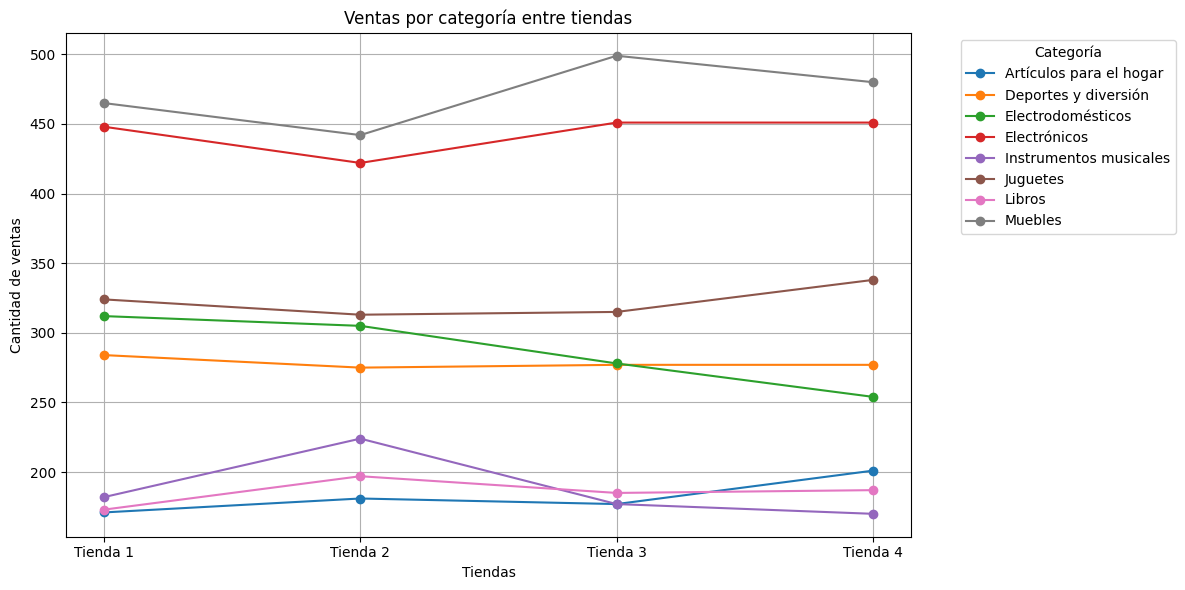

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Unir los datos en un solo DataFrame
df = pd.DataFrame({
    'Tienda 1': Venta_por_categoria,
    'Tienda 2': Venta_por_categoria2,
    'Tienda 3': Venta_por_categoria3,
    'Tienda 4': Venta_por_categoria4
})

df = df.fillna(0).astype(int)  # Asegura que todos los valores estén presentes y sean enteros

# Graficar
plt.figure(figsize=(12, 6))
for categoria in df.index:
    plt.plot(df.columns, df.loc[categoria], marker='o', label=categoria)

plt.title("Ventas por categoría entre tiendas")
plt.xlabel("Tiendas")
plt.ylabel("Cantidad de ventas")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [11]:
Calificacion_promedio = tienda['Calificación'].mean()
Calificacion_promedio2 = tienda2['Calificación'].mean()
Calificacion_promedio3 = tienda3['Calificación'].mean()
Calificacion_promedio4 = tienda4['Calificación'].mean()

print(f'la calificación promedio de la tienda 1 es: {Calificacion_promedio}, de la tienda 2 es: {Calificacion_promedio2}, de la tienda 3 es: {Calificacion_promedio3}, y de la tienda 4 es: {Calificacion_promedio4}')

la calificación promedio de la tienda 1 es: 3.976685036032217, de la tienda 2 es: 4.037303942348453, de la tienda 3 es: 4.048325561678677, y de la tienda 4 es: 3.9957591178965224


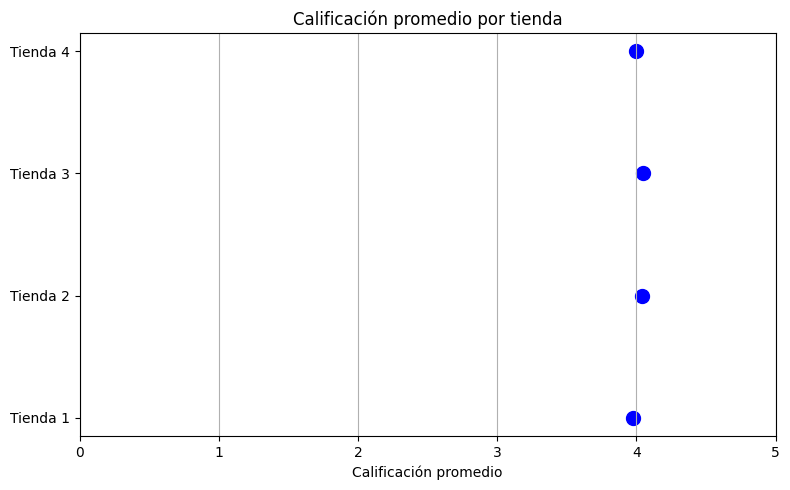

In [12]:
import matplotlib.pyplot as plt

calificaciones = [Calificacion_promedio, Calificacion_promedio2, Calificacion_promedio3, Calificacion_promedio4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 5))
plt.scatter(calificaciones, tiendas, color='blue', s=100)  # Puntos horizontales

plt.title('Calificación promedio por tienda')
plt.xlabel('Calificación promedio')
plt.xlim(0, 5)  # Escala de 0 a 5
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [13]:
# Tienda 1
ventas1 = tienda['Producto'].value_counts()
mas_vendido1 = ventas1.idxmax()
menos_vendido1 = ventas1.idxmin()

# Tienda 2
ventas2 = tienda2['Producto'].value_counts()
mas_vendido2 = ventas2.idxmax()
menos_vendido2 = ventas2.idxmin()

# Tienda 3
ventas3 = tienda3['Producto'].value_counts()
mas_vendido3 = ventas3.idxmax()
menos_vendido3 = ventas3.idxmin()

# Tienda 4
ventas4 = tienda4['Producto'].value_counts()
mas_vendido4 = ventas4.idxmax()
menos_vendido4 = ventas4.idxmin()

# Mostrar resultados
print("Tienda 1 - Más vendido:", mas_vendido1, "| Menos vendido:", menos_vendido1)
print("Tienda 2 - Más vendido:", mas_vendido2, "| Menos vendido:", menos_vendido2)
print("Tienda 3 - Más vendido:", mas_vendido3, "| Menos vendido:", menos_vendido3)
print("Tienda 4 - Más vendido:", mas_vendido4, "| Menos vendido:", menos_vendido4)

Tienda 1 - Más vendido: Microondas | Menos vendido: Auriculares con micrófono
Tienda 2 - Más vendido: Iniciando en programación | Menos vendido: Juego de mesa
Tienda 3 - Más vendido: Kit de bancas | Menos vendido: Bloques de construcción
Tienda 4 - Más vendido: Cama box | Menos vendido: Guitarra eléctrica


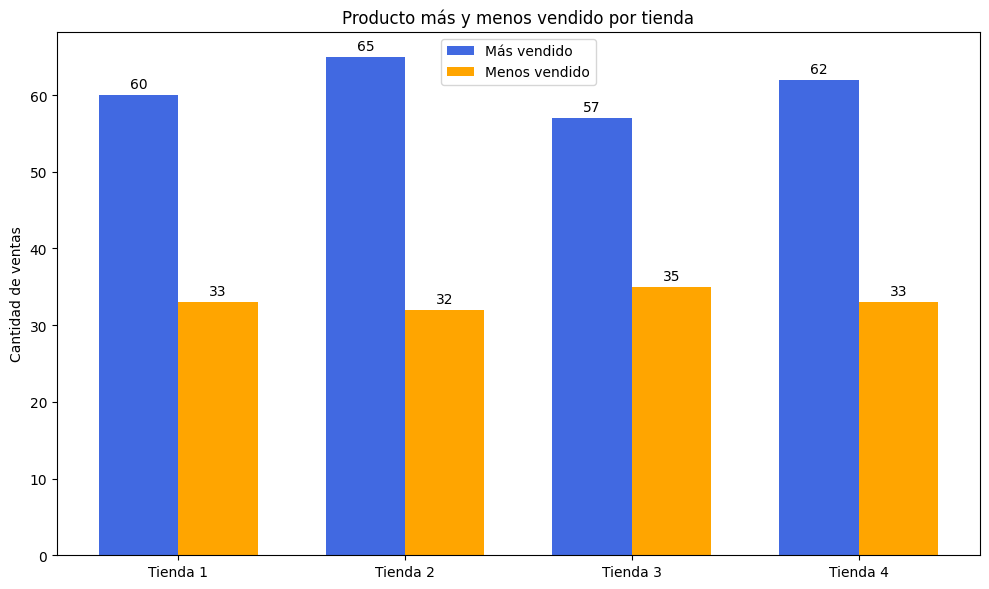

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Cantidades del producto más y menos vendido de cada tienda
ventas_mas = [
    ventas1[mas_vendido1],
    ventas2[mas_vendido2],
    ventas3[mas_vendido3],
    ventas4[mas_vendido4]
]

ventas_menos = [
    ventas1[menos_vendido1],
    ventas2[menos_vendido2],
    ventas3[menos_vendido3],
    ventas4[menos_vendido4]
]

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
x = np.arange(len(tiendas))
ancho = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
b1 = ax.bar(x - ancho/2, ventas_mas, width=ancho, label='Más vendido', color='royalblue')
b2 = ax.bar(x + ancho/2, ventas_menos, width=ancho, label='Menos vendido', color='orange')

# Etiquetas y formato
ax.set_ylabel('Cantidad de ventas')
ax.set_title('Producto más y menos vendido por tienda')
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.legend()

# Muestra cantidades
def agregar_etiquetas(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

agregar_etiquetas(b1)
agregar_etiquetas(b2)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [15]:
# Costo de envío promedio por tienda
envio_promedio1 = tienda['Costo de envío'].mean()
envio_promedio2 = tienda2['Costo de envío'].mean()
envio_promedio3 = tienda3['Costo de envío'].mean()
envio_promedio4 = tienda4['Costo de envío'].mean()

# Resultado
print(f"Costo de envío promedio Tienda 1: ${envio_promedio1:.2f}")
print(f"Costo de envío promedio Tienda 2: ${envio_promedio2:.2f}")
print(f"Costo de envío promedio Tienda 3: ${envio_promedio3:.2f}")
print(f"Costo de envío promedio Tienda 4: ${envio_promedio4:.2f}")


Costo de envío promedio Tienda 1: $26018.61
Costo de envío promedio Tienda 2: $25216.24
Costo de envío promedio Tienda 3: $24805.68
Costo de envío promedio Tienda 4: $23459.46


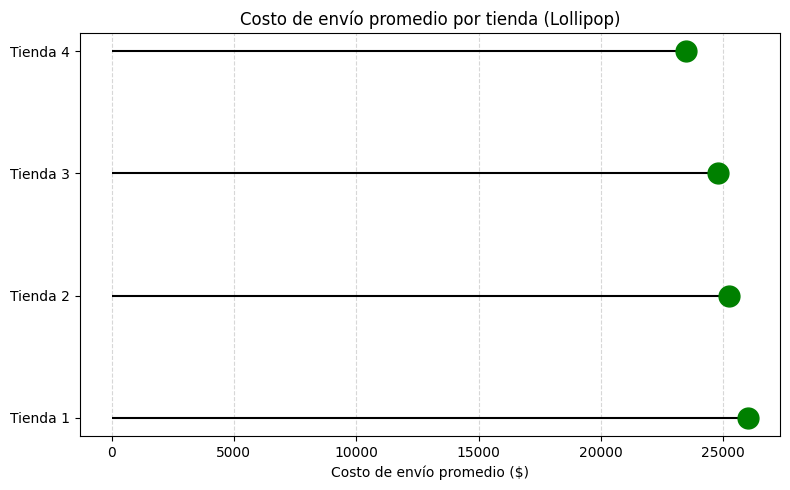

In [16]:
import matplotlib.pyplot as plt

costos = [envio_promedio1, envio_promedio2, envio_promedio3, envio_promedio4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 5))
plt.hlines(y=tiendas, xmin=0, xmax=costos, color='black')
plt.plot(costos, tiendas, 'o', color='green', markersize=15)

plt.xlabel('Costo de envío promedio ($)')
plt.title('Costo de envío promedio por tienda (Lollipop)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
